<a href="https://colab.research.google.com/github/mlimbuu/pytorch-GAT/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [38]:
# Choose a layout
def plot_graph(G):
  pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm

  # Draw the graph
  nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=700, font_size=16, font_color='darkred')
  plt.title('Graph Visualization')
  plt.show()

In [48]:
def plot_in_degree_distribution(G):
  # Alternatively, if you already have a NetworkX graph, you can skip the conversion.
  in_degrees = dict(G.in_degree())  # Returns a dictionary node: in-degree

  # Prepare the data for plotting
  nodes = list(G.nodes())
  in_values = [in_degrees[node] for node in nodes]

  # Plotting
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.bar(nodes, in_values, color='b')
  plt.title('In-Degree Distribution')
  plt.xlabel('Node ID')
  plt.ylabel('In-Degree Count')

  plt.tight_layout()
  plt.show()

def plot_out_degree_distribution(G):

  out_degrees = dict(G.out_degree())  # Returns a dictionary node: out-degree

  # Prepare the data for plotting
  nodes = list(G.nodes())
  out_values = [out_degrees[node] for node in nodes]

  # Plotting
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 2)
  plt.bar(nodes, out_values, color='r')
  plt.title('Out-Degree Distribution')
  plt.xlabel('Node ID')
  plt.ylabel('Out-Degree Count')

  plt.tight_layout()
  plt.show()



# Random Graph Data 1
Note: If graph is asymmetric make it symmetric before plotting in-out degree distribution.

In [61]:
# Example: Creating a sparse CSR matrix for demonstration
data = np.ones(5)
rows = np.array([0, 1, 2, 3, 4])
cols = np.array([1, 2, 3, 4, 0])
adj_matrix = csr_matrix((data, (rows, cols)), shape=(5, 5))

# Check if the matrix is symmetric
is_symmetric = np.allclose(adj_matrix.toarray(), adj_matrix.T.toarray())
print("The matrix is symmetric:", is_symmetric)

adj_matrix = adj_matrix + adj_matrix.T.multiply(adj_matrix.T > adj_matrix) - adj_matrix.multiply(adj_matrix.T > adj_matrix)
# Check if the updated matrix is symmetric
is_symmetric = np.allclose(adj_matrix.toarray(), adj_matrix.T.toarray())
print("The updated matrix is symmetric:", is_symmetric)

The matrix is symmetric: False
The updated matrix is symmetric: True


In [62]:
# Convert CSR matrix to a NetworkX graph
G = nx.from_scipy_sparse_array(adj_matrix, create_using=nx.DiGraph())

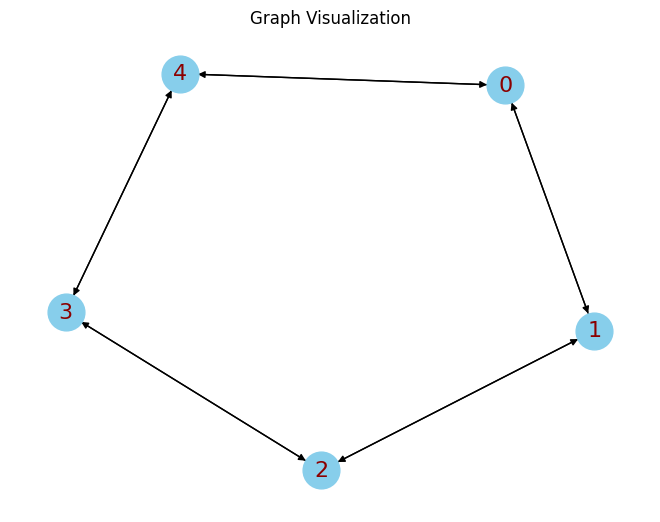

In [63]:
# Plot Graph
plot_graph(G)

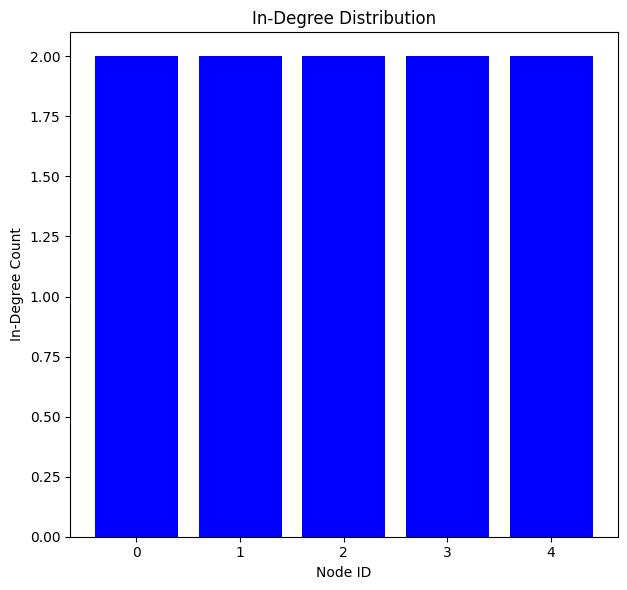

In [64]:
# Plot in and out degree distribution
plot_in_degree_distribution(G)

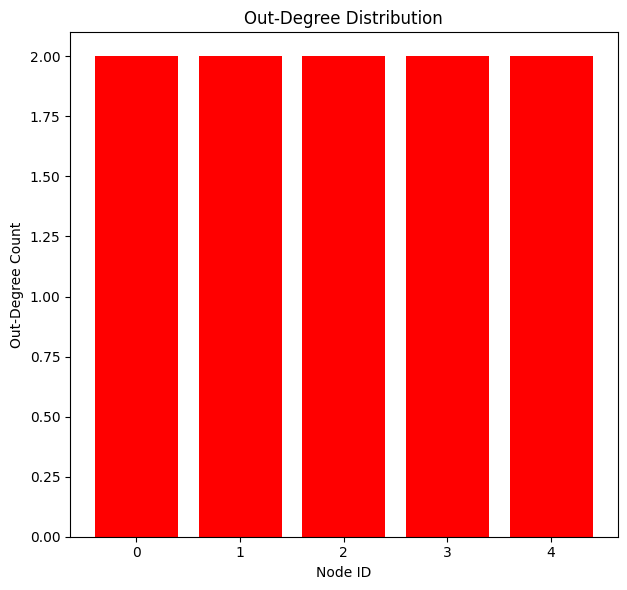

In [65]:
# Plot in and out degree distribution
plot_out_degree_distribution(G)

# Random Graph Data 2
Note: If graph is asymmetric make it symmetric before plotting in-out degree distribution.

In [66]:
# Create a random sparse matrix
data = np.random.rand(200)  # 100 non-zero items
rows = np.random.randint(0, 2708, size=200)  # Random row indices for non-zero items
cols = np.random.randint(0, 2708, size=200)  # Random column indices for non-zero items

# Create the sparse matrix
sparse_matrix = csr_matrix((data, (rows, cols)), shape=(2708, 2708), dtype=np.float32)

# Check if the matrix is symmetric
is_symmetric = np.allclose(sparse_matrix.toarray(), sparse_matrix.T.toarray())
print("The matrix is symmetric:", is_symmetric)

sparse_matrix = sparse_matrix + sparse_matrix.T.multiply(sparse_matrix.T > sparse_matrix) - sparse_matrix.multiply(sparse_matrix.T > sparse_matrix)
# Check if the updated matrix is symmetric
is_symmetric = np.allclose(sparse_matrix.toarray(), sparse_matrix.T.toarray())
print("The updated matrix is symmetric:", is_symmetric)

The matrix is symmetric: False
The updated matrix is symmetric: True


In [67]:
# Convert CSR matrix to a NetworkX graph
G = nx.from_scipy_sparse_array(sparse_matrix, create_using=nx.DiGraph())

In [68]:
# # Plot Graph
# plot_graph(G)

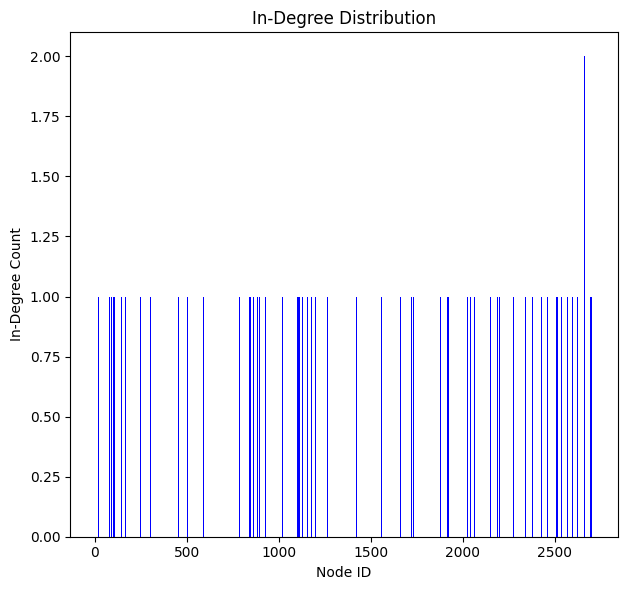

In [69]:
# Plot in and out degree distribution
plot_in_degree_distribution(G)

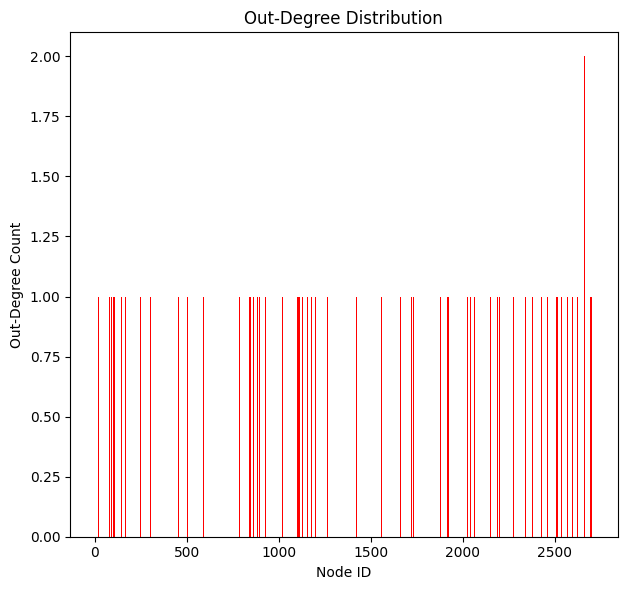

In [70]:
plot_out_degree_distribution(G)

# Cora Dataset
Note: Load the data, preprocess and plot it finally. Make sure it is symmetric.